In [1]:
%% Machine Learning Online Class
%  Exercise 6 | Support Vector Machines
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     gaussianKernel.m
%     dataset3Params.m
%     processEmail.m
%     emailFeatures.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc
graphics_toolkit ("gnuplot");
page_output_immediately(1);

In [2]:
%% =============== Part 1: Loading and Visualizing Data ================
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

Loading and Visualizing Data ...


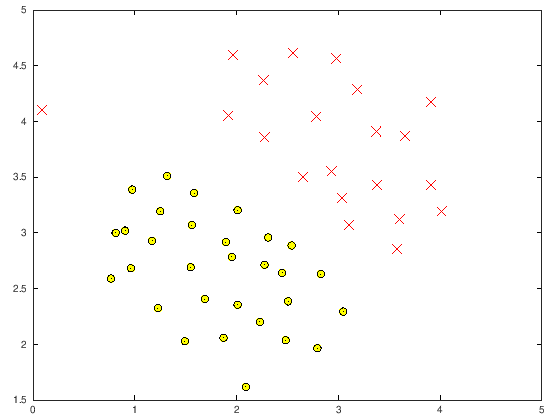

In [3]:
% Plot training data
plotData(X, y);

In [4]:
%% ==================== Part 2: Training Linear SVM ====================
%  The following code will train a linear SVM on the dataset and plot the
%  decision boundary learned.
%

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

fprintf('\nTraining Linear SVM ...\n')

% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)
C = 1;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);


Training Linear SVM ...

Training ......................................................................
................................... Done! 



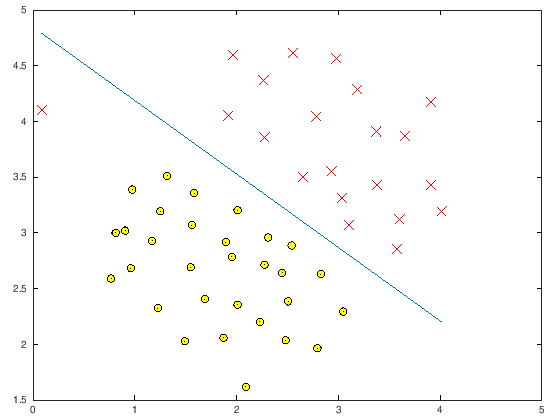

In [5]:
visualizeBoundaryLinear(X, y, model);

In [6]:
%% ==================== Part 2: Training Linear SVM ====================
%  The following code will train a linear SVM on the dataset and plot the
%  decision boundary learned.
%

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

fprintf('\nTraining Linear SVM ...\n')

% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)
C = 1000;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);


Training Linear SVM ...

Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
......................................................... Done! 



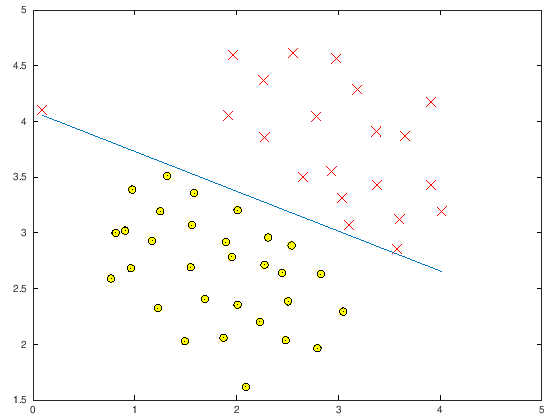

In [7]:
visualizeBoundaryLinear(X, y, model);

In [8]:
% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)

models = containers.Map(); 

cVec = [0.1 1 10 100];

for C=cVec
    models(num2str(C)) = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
end


Training .............................................. Done! 


Training ......................................................................
.................................................. Done! 


Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
................................................................. Done! 


Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................

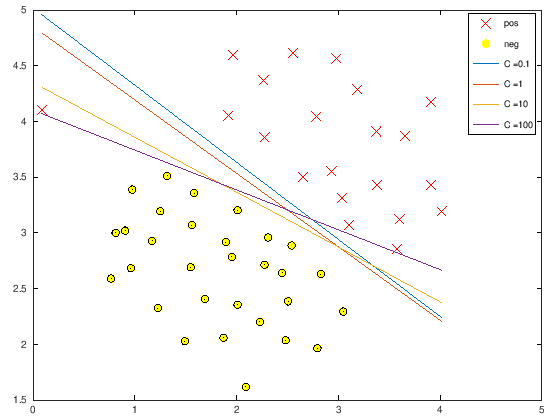

In [9]:
cVecStr = num2str([]);
plotData(X, y);

for C=cVec

cVecStr = [cVecStr; strcat('C = ',num2str(C))];

hold on
model = models(num2str(C));
w = model.w;
b = model.b;
xp = linspace(min(X(:,1)), max(X(:,1)), 100);
yp = - (w(1)*xp + b)/w(2);
%plot(xp, yp, '-b'); 
plot(xp, yp); 
hold off

end

legend(['pos' ;'neg'; cVecStr])

In [10]:
%% =============== Part 3: Implementing Gaussian Kernel ===============
%  You will now implement the Gaussian kernel to use
%  with the SVM. You should complete the code in gaussianKernel.m
%
fprintf('\nEvaluating the Gaussian Kernel ...\n')

x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
sim = gaussianKernel(x1, x2, sigma);

fprintf(['Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %f :' ...
         '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n'], sigma, sim);


Evaluating the Gaussian Kernel ...
Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2.000000 :
	0.324652
(for sigma = 2, this value should be about 0.324652)


In [2]:
%% =============== Part 4: Visualizing Dataset 2 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

Loading and Visualizing Data ...


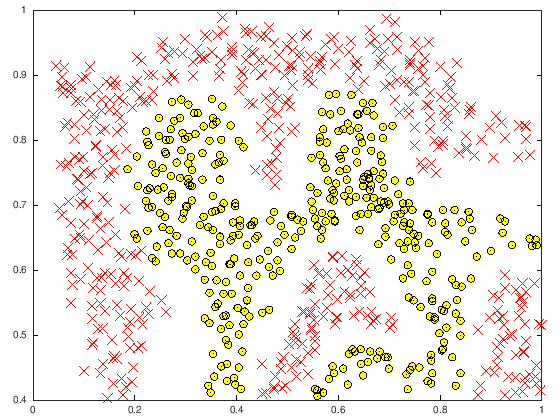

In [3]:
% Plot training data
plotData(X, y);


Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...

Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
....................................................... Done! 



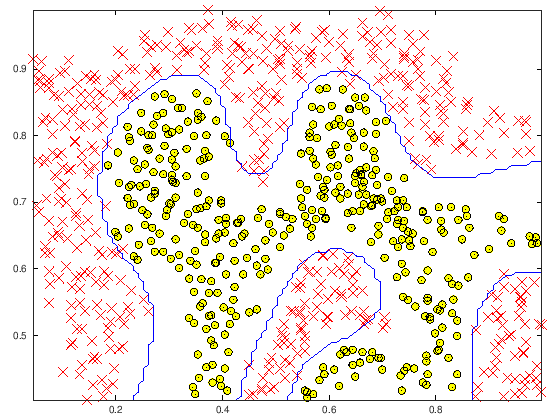

In [4]:
%% ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
%  After you have implemented the kernel, we can now use it to train the 
%  SVM classifier.
% 
fprintf('\nTraining SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n');

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

% SVM Parameters
C = 1; sigma = 0.1;

% We set the tolerance and max_passes lower here so that the code will run
% faster. However, in practice, you will want to run the training to
% convergence.

model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 
visualizeBoundary(X, y, model);

    image>__img__ at line 174 column 9
    image at line 125 column 10
    imagesc at line 101 column 12


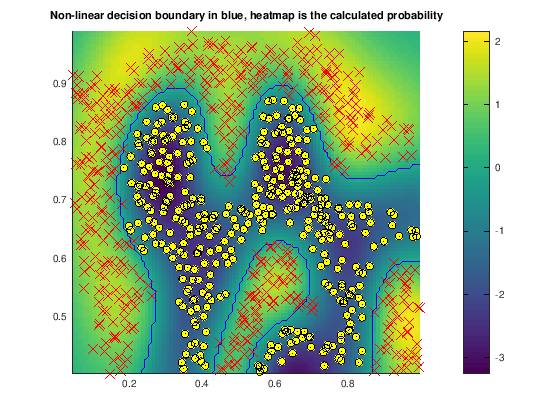

In [21]:
%VISUALIZEBOUNDARY plots a non-linear decision boundary learned by the SVM
%   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a non-linear decision 
%   boundary learned by the SVM and overlays the data on it

% Plot the training data on top of the boundary
% plotData(X, y)

% Make classification predictions over a grid of values
x1plot = linspace(min(X(:,1)), max(X(:,1)), 100)';
x2plot = linspace(min(X(:,2)), max(X(:,2)), 100)';
[X1, X2] = meshgrid(x1plot, x2plot);
vals = zeros(size(X1));
probs = zeros(size(X1));
for i = 1:size(X1, 2)
   this_X = [X1(:, i), X2(:, i)];
   [vals(:, i), probs(:, i)] = svmPredict(model, this_X);
end

% Plot the SVM boundary
hold on
imagesc(X1, X2, probs)%, [0.5 0.5]);
contour(X1, X2, vals, [0.5 0.5], 'b');
colorbar()
plotData(X, y)
ylim([min(X(:,2)), max(X(:,2))])
xlim([min(X(:,1)), max(X(:,1))])
title('Non-linear decision boundary in blue, heatmap is the calculated probability')
hold off;

In [14]:
%% =============== Part 6: Visualizing Dataset 3 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

Loading and Visualizing Data ...


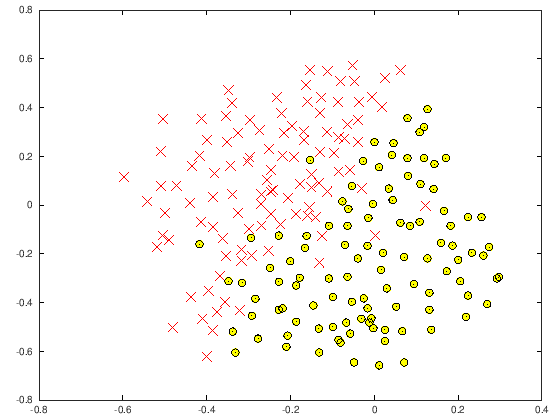

In [15]:
% Plot training data
plotData(X, y);

In [16]:
%% ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

%  This is a different dataset that you can use to experiment with. Try
%  different values of C and sigma here.
% 

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

C=0;
sigma=3;

% Try different SVM Parameters here
[C, sigma, errorsVec] = dataset3Params(X, y, Xval, yval);

Training for C and sigma    0.010000   0.010000

Training ......... Done! 

Training for C and sigma    0.100000   0.010000

Training ......... Done! 

Training for C and sigma    1.000000   0.010000

Training ......... Done! 

Training for C and sigma    10.000000    0.010000

Training .......... Done! 

Training for C and sigma    100.000000     0.010000

Training ......... Done! 

Training for C and sigma    0.010000   0.100000

Training ...................................... Done! 

Training for C and sigma    0.10000   0.10000

Training ......................................................................
................................ Done! 

Training for C and sigma    1.00000   0.10000

Training ......................................................................
...............................................................................
................................................................ Done! 

Training for C and sigma    10.00000    0.10000

Training ..

In [17]:
printf('Best C and sigma '), disp([C, sigma])

Best C and sigma    1.00000   0.10000



Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
.......................................................................... Done! 



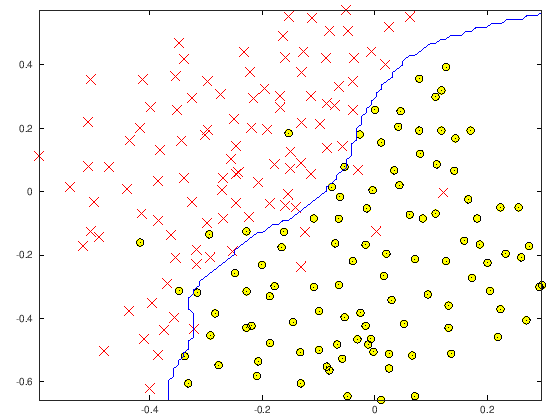

In [18]:
% Train the SVM
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));
visualizeBoundary(X, y, model);

In [19]:
errorsVec

errorsVec =

     0.010000     0.010000     0.565000
     0.100000     0.010000     0.565000
     1.000000     0.010000     0.565000
    10.000000     0.010000     0.565000
   100.000000     0.010000     0.565000
     0.010000     0.100000     0.045000
     0.100000     0.100000     0.045000
     1.000000     0.100000     0.030000
    10.000000     0.100000     0.070000
   100.000000     0.100000     0.065000
     0.010000     1.000000     0.185000
     0.100000     1.000000     0.170000
     1.000000     1.000000     0.080000
    10.000000     1.000000     0.090000
   100.000000     1.000000     0.195000
     0.010000    10.000000     0.180000
     0.100000    10.000000     0.185000
     1.000000    10.000000     0.185000
    10.000000    10.000000     0.160000
   100.000000    10.000000     0.075000
     0.010000   100.000000     0.180000
     0.100000   100.000000     0.180000
     1.000000   100.000000     0.180000
    10.000000   100.000000     0.180000
   100.000000   100.000000 

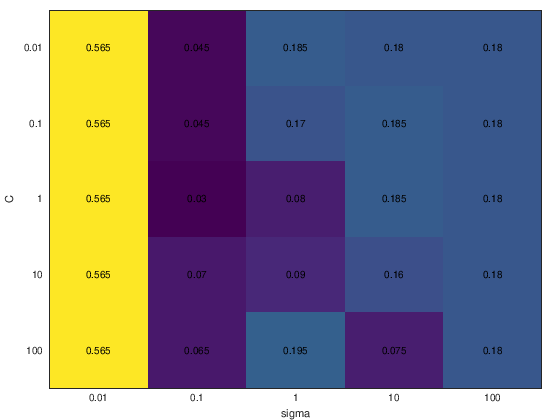

In [20]:
% https://www.mathworks.com/matlabcentral/answers/99917-how-can-i-label-each-pixel-of-the-output-of-imagesc-with-its-value
N = 5;
vec = [0.01, 0.1, 1, 10, 100];
M = reshape(errorsVec(:,3), N,N);
xmat = repmat(1:N,N,1); % generate x-coordinates
ymat = xmat'; % generate y-coordinates
% Generate Labels
t = num2cell(M); % extract values into cells
t = cellfun(@num2str, t, 'UniformOutput', false); % convert to string
% Draw Image and Label Pixels
% imagesc(xmat,ymat,M)
imagesc(M)

% set(gca, 'YScale', 'log')
% set(gca, 'XScale', 'log')
text(xmat(:), ymat(:), t, 'HorizontalAlignment', 'Center')

set(gca,'XTick',1:N,...
    'XTickLabel', vec,...
    'YTick',1:N,...
    'YTickLabel',vec,...
    'TickLength',[0 0]);
xlabel('sigma');
ylabel('C');

    legend at line 478 column 13


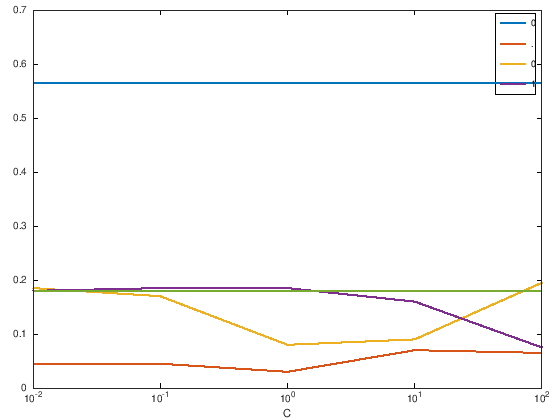

In [21]:
vec = [0.01, 0.1, 1, 10, 100];
semilogx(vec,M,'linewidth',4)
xlabel('C')
legend([num2str(vec)]')

In [22]:
%DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
%where you select the optimal (C, sigma) learning parameters to use for SVM
%with RBF kernel
%   [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
%   sigma. You should complete this function to return the optimal C and 
%   sigma based on a cross-validation set.
%

% You need to return the following variables correctly.
%C = 1;
%sigma = 0.3;

% ====================== YOUR CODE HERE ======================
% Instructions: Fill in this function to return the optimal C and sigma
%               learning parameters found using the cross validation set.
%               You can use svmPredict to predict the labels on the cross
%               validation set. For example, 
%                   predictions = svmPredict(model, Xval);
%               will return the predictions on the cross validation set.
%
%  Note: You can compute the prediction error using 
%        mean(double(predictions ~= yval))
%

% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)

models = containers.Map(); 
preds = containers.Map(); 
val_errors = containers.Map(); 

%cVec = [0.1, 0.3, 1, 3, 10];
cVec = [0.1*(2).**(0:6) 10];
sigmaVec = [0.01*(2).**(0:6) 1];

errorsVec = [];

for sigma_i = sigmaVec

    for C_i = cVec
        
        printf('Training for C and sigma '), disp([C_i, sigma_i])
        
        model = svmTrain(X, y, C_i, @(x1, x2) gaussianKernel(x1, x2, sigma_i));
        
        models(strcat(num2str(C_i),',', num2str(sigma_i))) = model;
        
        predictions = svmPredict(model, Xval);
        
        preds(strcat(num2str(C_i),',', num2str(sigma_i))) = predictions;
        
        val_errors(strcat(num2str(C_i),',', num2str(sigma_i))) = mean(double(predictions ~= yval));
        
        errorsVec = [errorsVec; [C_i, sigma_i, mean(double(predictions ~= yval))] ];
    end
end

% find min value of val_errors 
% from mathworks
%https://www.mathworks.com/matlabcentral/answers/98444-how-can-i-retrieve-the-key-which-belongs-to-a-specified-value-using-the-array-containers-map-in-matl

testvalue = min([values(val_errors){:} ]);

testind = cellfun(@(x)isequal(x,testvalue), values(val_errors) );

testkeys = keys(val_errors);

msg_key = testkeys(testind){1};

C = str2num( strsplit (msg_key, ","){1});
sigma = str2num(strsplit (msg_key, ","){2});

% =========================================================================

Training for C and sigma    0.100000   0.010000

Training ......... Done! 

Training for C and sigma    0.200000   0.010000

Training ......... Done! 

Training for C and sigma    0.400000   0.010000

Training ......... Done! 

Training for C and sigma    0.800000   0.010000

Training ......... Done! 

Training for C and sigma    1.600000   0.010000

Training ......... Done! 

Training for C and sigma    3.200000   0.010000

Training ......... Done! 

Training for C and sigma    6.400000   0.010000

Training ......... Done! 

Training for C and sigma    1.000000   0.010000

Training ......... Done! 

Training for C and sigma    0.100000   0.020000

Training ......... Done! 

Training for C and sigma    0.200000   0.020000

Training ......... Done! 

Training for C and sigma    0.400000   0.020000

Training ......... Done! 

Training for C and sigma    0.800000   0.020000

Training ......... Done! 

Training for C and sigma    1.600000   0.020000

Training ......... Done! 

Training for

In [23]:
disp(['Best C ', num2str(C), ' and sigma ', num2str(sigma)])

Best C 0.4 and sigma 0.08


In [24]:
errorsVec

errorsVec =

   0.100000   0.010000   0.565000
   0.200000   0.010000   0.565000
   0.400000   0.010000   0.565000
   0.800000   0.010000   0.565000
   1.600000   0.010000   0.565000
   3.200000   0.010000   0.565000
   6.400000   0.010000   0.565000
   1.000000   0.010000   0.565000
   0.100000   0.020000   0.565000
   0.200000   0.020000   0.565000
   0.400000   0.020000   0.565000
   0.800000   0.020000   0.565000
   1.600000   0.020000   0.565000
   3.200000   0.020000   0.565000
   6.400000   0.020000   0.565000
   1.000000   0.020000   0.565000
   0.100000   0.040000   0.050000
   0.200000   0.040000   0.050000
   0.400000   0.040000   0.050000
   0.800000   0.040000   0.055000
   1.600000   0.040000   0.065000
   3.200000   0.040000   0.065000
   6.400000   0.040000   0.080000
   1.000000   0.040000   0.055000
   0.100000   0.080000   0.035000
   0.200000   0.080000   0.035000
   0.400000   0.080000   0.030000
   0.800000   0.080000   0.035000
   1.600000   0.080000   0.035000
 

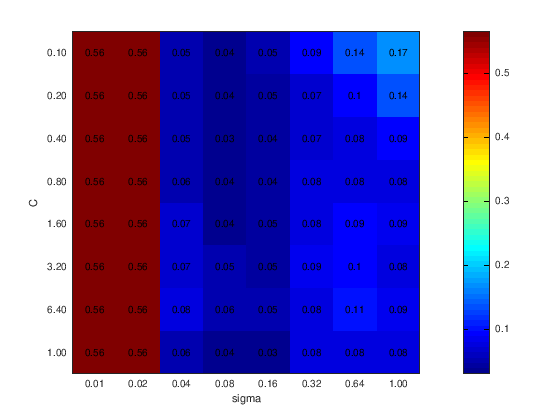

In [25]:
% https://www.mathworks.com/matlabcentral/answers/99917-how-can-i-label-each-pixel-of-the-output-of-imagesc-with-its-value
N = length(cVec);
M = reshape(errorsVec(:,3), N,N);
xmat = repmat(1:N,N,1); % generate x-coordinates
ymat = xmat'; % generate y-coordinates
% Generate Labels
t = num2cell(round(M * 100) ./ 100); % extract values into cells

t = cellfun(@num2str, t, 'UniformOutput', false); % convert to string
% t = round(t);
% Draw Image and Label Pixels
% imagesc(xmat,ymat,M)
imagesc(M)

% set(gca, 'YScale', 'log')
% set(gca, 'XScale', 'log')
% text(xmat(:), ymat(:), t, 'HorizontalAlignment', 'Center')
text(xmat(:), ymat(:), t, 'HorizontalAlignment', 'Center')

set(gca,'XTick',1:N,...
    'XTickLabel', sigmaVec,...
    'YTick',1:N,...
    'YTickLabel',cVec,...
    'TickLength',[0 0]);
set(gca,'xticklabel',cellstr (num2str (sigmaVec (:), "%.2f")))
set(gca,'yticklabel',cellstr (num2str (cVec (:), "%.2f")))
colormap('jet')
colorbar()
xlabel('sigma');
ylabel('C');

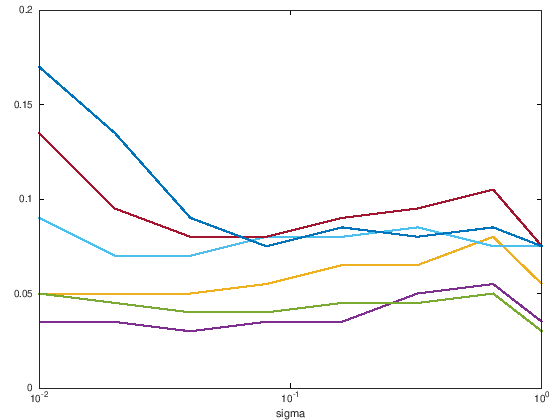

In [28]:
semilogx(sigmaVec,M,'linewidth',4)
xlabel('sigma')
ylim([0 0.2])
% legend([num2str(vec)]')


Training ......................................................................
...............................................................................
...............................................................................
........................................................................ Done! 



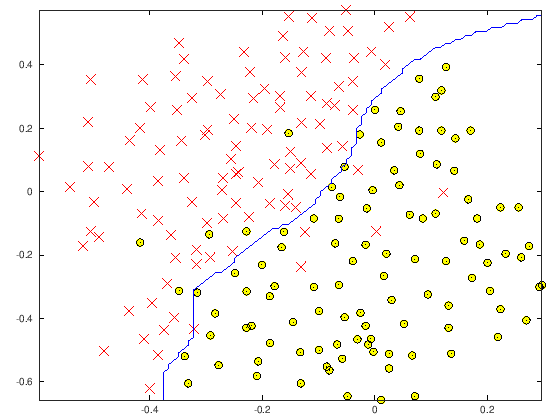

In [27]:
% Train the SVM
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));
visualizeBoundary(X, y, model);